In [1]:
#Import libraries for analysis

import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import random
import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv("Cleaned_Laptop_data.csv")
df.shape

(896, 23)

In [12]:
df.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234


In [83]:
#Inspect data types and potential null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           896 non-null    object 
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    object 
 8   hdd              896 non-null    object 
 9   os               896 non-null    object 
 10  os_bit           896 non-null    object 
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

In [42]:
#Check for null values.
df.isna().sum()

brand              0
model              0
processor_brand    0
processor_name     0
processor_gnrtn    0
ram_gb             0
ram_type           0
ssd                0
hdd                0
os                 0
os_bit             0
graphic_card_gb    0
weight             0
display_size       0
warranty           0
Touchscreen        0
msoffice           0
latest_price       0
old_price          0
discount           0
star_rating        0
ratings            0
reviews            0
dtype: int64

In [13]:
df.columns

Index(['brand', 'model', 'processor_brand', 'processor_name',
       'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit',
       'graphic_card_gb', 'weight', 'display_size', 'warranty', 'Touchscreen',
       'msoffice', 'latest_price', 'old_price', 'discount', 'star_rating',
       'ratings', 'reviews'],
      dtype='object')

In [27]:
df_copy = df.copy()

In [28]:
#Clean the ram_gb column

gb_replacement = {
    '4 GB GB': "4 GB",
    "8 GB GB": "8 GB",
    "16 GB GB": "16 GB",
    "32 GB GB": "32 GB"
}

df_copy['ram_gb'] = df_copy['ram_gb'].replace(gb_replacement)  


In [29]:
df_copy['ram_gb'].unique()

array(['4 GB', '8 GB', '32 GB', '16 GB'], dtype=object)

In [30]:
df_copy.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234


In [31]:
#Add USD column for latest price and old price for USD
# https://www.xe.com/currencyconverter/ - source for converting as of 07/29/24

inrToUsd = 0.011939

df_copy['latest_price_usd'] = df_copy['latest_price'].map(lambda x: x * inrToUsd).round(2)
df_copy['old_price_usd'] = df_copy['old_price'].map(lambda x: x * inrToUsd).round(2)

In [53]:
#rename some columns for interpretability.

rename_columns = {
    "ssd": "solid_state_drive",
    "hdd": "hard_disk_drive",
    "os": "operating_system",
    "processor_gnrtn": "processor_generation",
    "Touchscreen": "touch_screen",
    "os_bit": "operating_system_bit",
    "reviews": "review_count"
}

df_copy.rename(columns=rename_columns, inplace=True)

In [54]:
df_copy.columns

Index(['brand', 'model', 'processor_brand', 'processor_name',
       'processor_generation', 'ram_gb', 'ram_type', 'solid_state_drive',
       'hard_disk_drive', 'operating_system', 'operating_system_bit',
       'graphic_card_gb', 'weight', 'display_size', 'warranty', 'touch_screen',
       'msoffice', 'latest_price', 'old_price', 'discount', 'star_rating',
       'ratings', 'review_count', 'latest_price_usd', 'old_price_usd'],
      dtype='object')

In [60]:
#clean up data in brands column so its all title case and not upper case or lowercase
df_copy['brand'] = df_copy['brand'].map(lambda x: x.title())
df_copy['brand'].unique()

array(['Lenovo', 'Avita', 'Hp', 'Acer', 'Asus', 'Dell', 'Redmibook',
       'Realme', 'Infinix', 'Msi', 'Microsoft', 'Smartron', 'Lg', 'Nokia',
       'Apple', 'Vaio', 'Mi', 'Alienware', 'Iball', 'Samsung'],
      dtype=object)

In [65]:
type(df_copy['weight'])

pandas.core.series.Series

In [104]:
#Create dataframe with items i will only be working with.
columns = ['brand', 'model', 'processor_brand','processor_name','processor_generation','ram_gb', 'ram_type', 'solid_state_drive', 'hard_disk_drive', 'operating_system', 'graphic_card_gb', 'weight', 'warranty', 'star_rating', 'ratings', 'latest_price_usd', 'old_price_usd']

clean_df = df_copy[columns]
clean_df

,brand,model,processor_brand,processor_name,processor_generation,ram_gb,ram_type,solid_state_drive,hard_disk_drive,operating_system,graphic_card_gb,weight,warranty,star_rating,ratings,latest_price_usd,old_price_usd
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB,DDR4,0 GB,1024 GB,Windows,0,ThinNlight,0,3.7,63,298.36,391.48
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB,DDR4,0 GB,512 GB,Windows,0,Casual,0,3.6,1894,233.89,254.60
2,Avita,PURA,AMD,APU Dual,10th,4 GB,DDR4,128 GB,0 GB,Windows,0,ThinNlight,0,3.7,1153,238.66,334.17
3,Avita,PURA,AMD,APU Dual,10th,4 GB,DDR4,128 GB,0 GB,Windows,0,ThinNlight,0,3.7,1153,256.57,334.17
4,Avita,PURA,AMD,APU Dual,10th,4 GB,DDR4,256 GB,0 GB,Windows,0,ThinNlight,0,3.7,1657,298.36,399.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,Asus,ROG,AMD,Ryzen 9,Missing,4 GB,DDR4,1024 GB,0 GB,Windows,0,Casual,1,0.0,0,1731.04,2327.99
892,Asus,Ryzen,AMD,Ryzen 9,Missing,4 GB,DDR4,1024 GB,0 GB,Windows,4,Casual,1,0.0,0,1790.73,0.00
893,Asus,Ryzen,AMD,Ryzen 9,Missing,4 GB,DDR4,1024 GB,0 GB,Windows,4,Casual,1,0.0,0,1707.16,0.00
894,Samsung,Galaxy,Qualcomm,Snapdragon 7c,Missing,4 GB,LPDDR4X,0 GB,512 GB,Windows,0,Casual,0,0.0,0,465.50,572.95


In [72]:
clean_df['star_rating'].unique()

array([3.7, 3.6, 3.9, 0. , 4.2, 2.3, 3.8, 3.1, 3.5, 4.5, 4. , 4.1, 4.3,
       4.4, 4.6, 4.8, 5. , 3.3, 4.7, 3.4, 3. , 2. , 3.2, 2.9, 2.8, 1.6,
       4.9, 1.7, 2.5, 2.7])

# Section 2: Descriptive questions

### 1.Which brands are rated the highest?

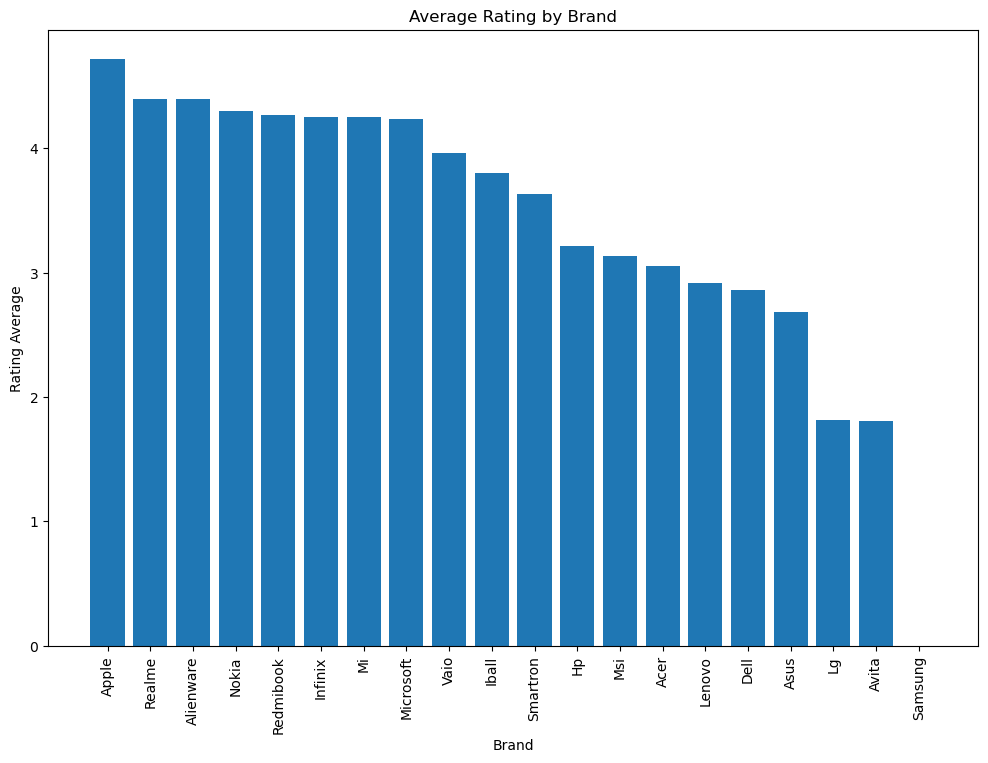

In [96]:
#Get average rating per brand
average_ratings = clean_df.groupby('brand')['star_rating'].mean().reset_index()
average_ratings = average_ratings.sort_values(by='star_rating', ascending=False)
average_ratings

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12,8))

ax.bar(x=average_ratings['brand'], height=average_ratings['star_rating'])
ax.set_xlabel("Brand")
ax.set_ylabel("Rating Average")
ax.set_title("Average Rating by Brand")
plt.xticks(rotation=90)



plt.show()

### 2. Which brand is the most expensive?

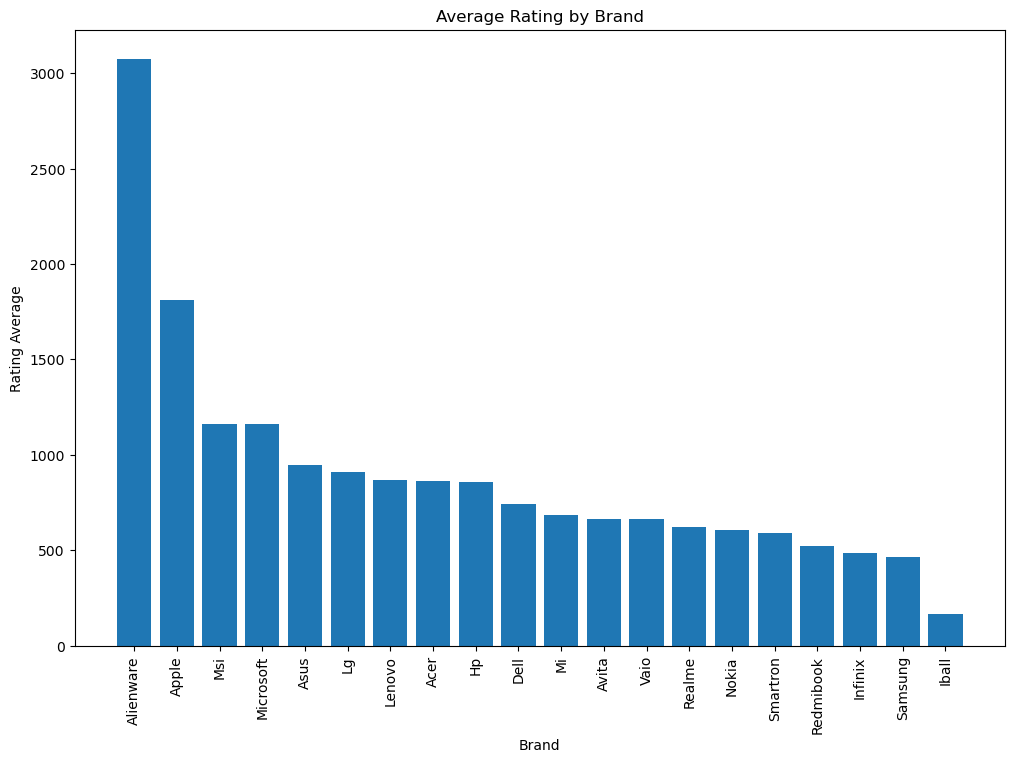

In [100]:
average_price = clean_df.groupby('brand')['latest_price_usd'].mean().reset_index()
average_price = average_price.sort_values(by='latest_price_usd', ascending=False)
average_price

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12,8))

ax.bar(x=average_price['brand'], height=average_price['latest_price_usd'])
ax.set_xlabel("Brand")
ax.set_ylabel("Rating Average")
ax.set_title("Average Rating by Brand")
plt.xticks(rotation=90)



plt.show()

### 3. Are AMD or Intel processor laptops more expensive?

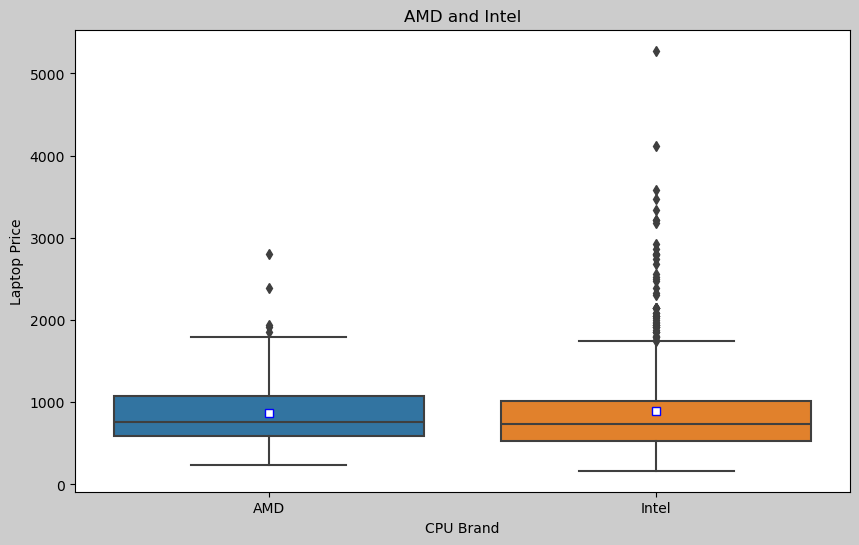

In [126]:
AMD_INTEL_MASK = (clean_df['processor_brand'] == "Intel") | (clean_df['processor_brand'] == "AMD")
amd_intel_df = clean_df[AMD_INTEL_MASK]

# amd_intel_df.groupby("processor_brand")['latest_price_usd'].mean().reset_index()


#Box plot distribution of wine ratings and their country of origin


plt.figure(figsize=(10, 6), facecolor="#cccccc")
sns.boxplot(x='processor_brand', y='latest_price_usd', data=amd_intel_df, showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})
plt.title('AMD and Intel')
plt.xlabel('CPU Brand')
plt.ylabel('Laptop Price')
plt.show()